1.- CAPM Method

In [84]:
from yahoo_fin import stock_info as si
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Define the stock symbol and the benchmark (market) symbol
stock_symbol = 'AAPL' # Replace with your desired stock symbol
benchmark_symbol = '^GSPC'  # Replace with your desired benchmark symbol

# Define the date range for the data
start_date = '2018-01-01'  # Replace with your desired start date
end_date = '2021-12-31'  # Replace with your desired end date

# Fetch stock and benchmark data from Yahoo Finance using pandas_datareader
stock_data = si.get_data(stock_symbol, start_date=start_date, end_date=end_date)
benchmark_data = si.get_data(benchmark_symbol, start_date=start_date, end_date=end_date)

# Extract the stock returns and benchmark returns
stock_returns = stock_data['adjclose'].pct_change().dropna()
benchmark_returns = benchmark_data['adjclose'].pct_change().dropna()

# Combine stock returns and benchmark returns into a single DataFrame
data = pd.concat([stock_returns, benchmark_returns], axis=1).dropna()

# Set up the dependent variable (stock returns)
y = data.iloc[:, :-1]

# Set up the independent variable (benchmark returns)
X = sm.add_constant(data.iloc[:, -1])

# Fit the CAPM model
model = sm.OLS(y, X)
results = model.fit()

# Print the CAPM model results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:               adjclose   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1520.
Date:                Sun, 11 Jun 2023   Prob (F-statistic):          3.74e-203
Time:                        13:36:31   Log-Likelihood:                 2936.6
No. Observations:                1006   AIC:                            -5869.
Df Residuals:                    1004   BIC:                            -5859.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.000      2.132      0.0

1.2 .- CAPM Method

In [5]:

import statsmodels.api as sm
import numpy as np
import pandas as pd

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime


# Define the stock symbol and the benchmark (market) symbol
#stock_symbol = ['AAPL', 'GOOG'] # Replace with your desired stock symbol
stock_symbol = 'AAPL'
#benchmark_symbol = '^GSPC'  # Replace with your desired benchmark symbol
benchmark_symbol = 'SPY'

# Define the date range for the data
start_date = '2022-01-01'  # Replace with your desired start date
end_date = '2023-01-01'  # Replace with your desired end date

# Fetch stock and benchmark data from Yahoo Finance using pandas_datareader
stock_data = pdr.DataReader(stock_symbol, start=start_date, end=end_date)
benchmark_data = pdr.DataReader(benchmark_symbol, start=start_date, end=end_date)

# Extract the stock returns and benchmark returns
stock_returns = stock_data['Adj Close'].pct_change().dropna()
benchmark_returns = benchmark_data['Adj Close'].pct_change().dropna()

# Combine stock returns and benchmark returns into a single array
returns = np.column_stack((stock_returns.values, benchmark_returns.values))

# Add a column of ones as an intercept to the returns array
returns = np.column_stack((np.ones(stock_returns.shape[0]), returns))

# Perform linear regression to estimate the CAPM model parameters
cov_matrix = np.cov(returns, rowvar=False)
beta = cov_matrix[1:, -1] / cov_matrix[-1, -1]
alpha = np.mean(returns[:, 0]) - np.dot(beta, np.mean(returns[:, 1:]))

# Print the CAPM model parameters
print("Alpha:", alpha)
print("Beta:", beta)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Alpha: [1.00115897 1.00089102]
Beta: [1.30072635 1.        ]


1.3 Learning Step by Step

In [52]:
from scipy import stats
import pandas as pd

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
start = '2013-01-01'
end = '2016-01-01'

In [56]:
df_spy = pdr.DataReader('SPY',start=start, end=end)
df_spy.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,145.110001,146.149994,144.729996,146.059998,120.846947,192059000
2013-01-03,145.990005,146.369995,145.339996,145.729996,120.573921,144761800
2013-01-04,145.970001,146.610001,145.669998,146.369995,121.103401,116817700
2013-01-07,145.850006,146.110001,145.429993,145.970001,120.772438,110002500
2013-01-08,145.710007,145.910004,144.979996,145.550003,120.424973,121265100


In [61]:
df_fb = pdr.DataReader('META',start=start, end=end)
df_fb.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.440001,28.180000,27.420000,28.000000,28.000000,69846400
2013-01-03,27.879999,28.469999,27.590000,27.770000,27.770000,63140600
2013-01-04,28.010000,28.930000,27.830000,28.760000,28.760000,72715400
2013-01-07,28.690001,29.790001,28.650000,29.420000,29.420000,83781800
2013-01-08,29.510000,29.600000,28.860001,29.059999,29.059999,45871300


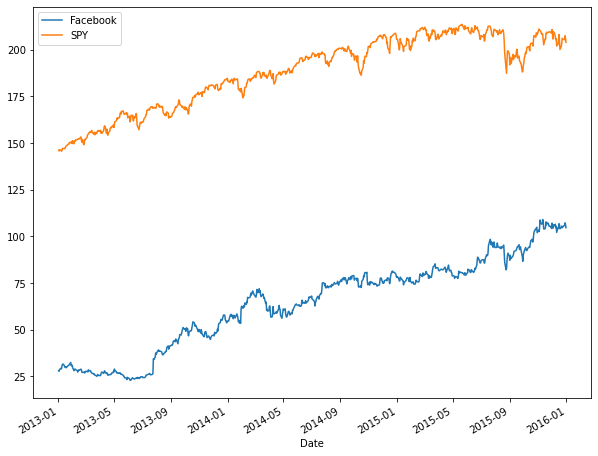

In [62]:
df_fb['Close'].plot(label = 'Facebook', figsize=(10,8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

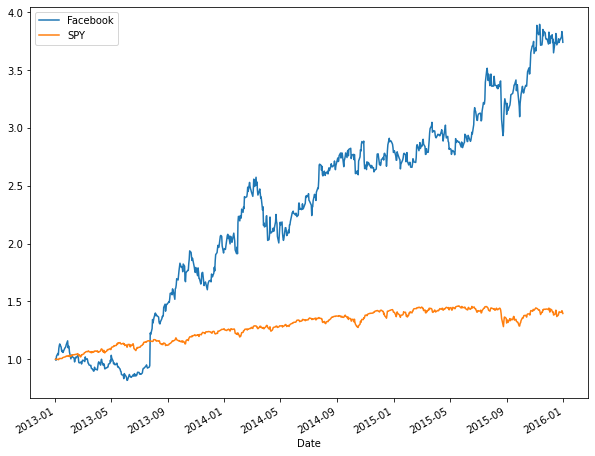

In [71]:
df_fb['Cumu'] = df_fb['Close']/df_fb['Close'].iloc[0]
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_fb['Cumu'].plot(label = 'Facebook', figsize=(10,8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

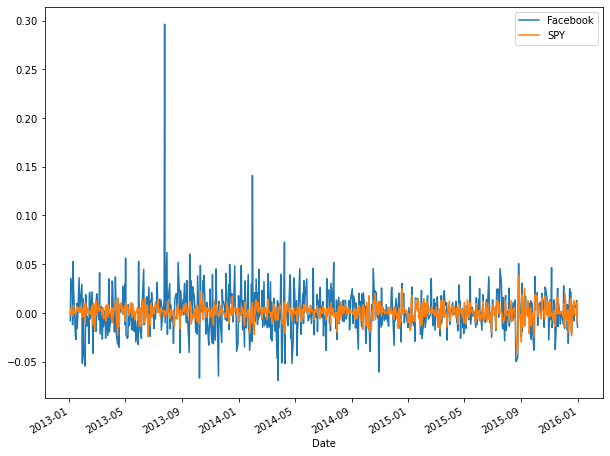

In [78]:
# Percent changes on a day
df_fb['daily_ret'] = df_fb['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)

df_fb['daily_ret'].plot(label = 'Facebook', figsize=(10,8))
df_spy['daily_ret'].plot(label = 'SPY')
plt.legend()

In [87]:
LR = stats.linregress(df_spy['daily_ret'].iloc[1:], df_fb['daily_ret'].iloc[1:])
LR

LinregressResult(slope=1.1919392933079962, intercept=0.0014414224384153847, rvalue=0.4126977835182081, pvalue=2.0652044842802583e-32, stderr=0.09586939003791027, intercept_stderr=0.0007712410224223625)

In [82]:
beta,alpha,r_val,p_val,std_err = LR

# Creating a df with B for all S&P 500

In [12]:
# Put it all in a function

from scipy import stats
import pandas as pd
import numpy as np

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

import scipy.optimize as sco

import matplotlib.pyplot as plt
%matplotlib inline

# Get S&P 500 ticketer symbol
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
stock_symbols = df['Symbol'].values.tolist()
stock_symbols = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
       'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE',
       'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN',
       'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK',
       'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA',
       'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO',
       'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI',
       'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK',
       'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
       'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX',
       'CCL', 'CTLT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY',
       'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI',
       'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO',
       'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO',
       'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI',
       'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN',
       'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ',
       'DOV', 'DOW', 'DTE']

# Variables
start = '2017-10-01'
end = '2021-09-30'
bench_mark = '^GSPC'

# Moving variables

sp500_dict = {'compny': [],
              'Betha': [],
              'Alpha': [],
              'expected_return': []}


# Read bench March
df_bch = pdr.DataReader(bench_mark,start=start, end=end)['Adj Close']
df_bch.name = bench_mark

# Return
df_bch = df_bch.pct_change().dropna()

# Market Returns
returns = df_bch

for stock in stock_symbols:
    # Read Stock 
    df = pdr.DataReader(stock,start=start, end=end)['Adj Close']
    df.name = stock

    # Quarterly data
    # df_bch.resample('Y').last()
    # df.resample('Y').last()

    # Percent changes on a day
    df = df.pct_change().dropna()

    # Add to market returns
    returns = pd.concat([returns, df], axis=1).dropna()

    # Set the risk-free rate (e.g., 10-year Treasury yield)
    risk_free_rate = 0.04

    # Build Model 
    try:
        LR = stats.linregress(df_bch, df)
        beta,alpha,r_val,p_val,std_err = LR
    except Exception:
    # Code block to handle any exception generically
        beta = 1
        alpha = np.nan

    # Calculate expected return using CAPM formula
    expected_return = risk_free_rate + beta * (np.mean(returns['^GSPC']) - risk_free_rate)
    
    # Add them to the stock
    sp500_dict['compny'].append(stock)
    sp500_dict['Betha'].append(beta)
    sp500_dict['Alpha'].append(alpha)
    sp500_dict['expected_return'].append(expected_return)


# Calculate Cov Matrix
cov_matrix = returns.iloc[:,1:].cov()

# Calculate expected returns using CAPM
betas = np.array(sp500_dict['Betha'])
expected_returns = np.array(sp500_dict['expected_return'])

# Define the portfolio optimization objective function
def portfolio_objective(weights, expected_returns, cov_matrix, target_return):
    portfolio_return = np.sum(weights * expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights.T)))
    penalty = 100 * abs(portfolio_return - target_return)
    return portfolio_volatility + penalty

# Define the constraint for maximum weight per stock
def max_weight_constraint(weights):
    return np.sum(weights) - 1.0

# Set the target return for the portfolio
target_return = 0.15

# Perform portfolio optimization to find the optimal weights
num_assets = len(stock_symbols)
constraints = ({'type': 'eq', 'fun': max_weight_constraint},
                {'type': 'eq', 'fun': lambda x: np.sum(x * expected_returns) - target_return})
bounds = tuple((0, 0.25) for _ in range(num_assets))  # Restrict weights to a maximum of 30%
initial_weights = np.ones(num_assets) / num_assets
optimal_weights = sco.minimize(portfolio_objective, initial_weights,
                                args=(expected_returns, cov_matrix, target_return),
                                method='SLSQP', bounds=bounds, constraints=constraints)['x']

# Print the optimal portfolio weights
for i, symbol in enumerate(stock_symbols):
    print(f"{symbol}: {optimal_weights[i]}")

# Filter stocks based on minimum weight threshold
filtered_stocks = [stock for stock, weight in zip(stock_symbols, optimal_weights) if weight > .01]

filtered_stocks


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

['CPB', 'CHD', 'CLX', 'CAG']

In [13]:
df = pd.DataFrame(sp500_dict)
df.sort_values('expected_return', ascending=False)

,compny,Betha,Alpha,expected_return
112,CLX,0.284290,0.000306,0.028817
85,CPB,0.341302,-0.000016,0.026563
120,CAG,0.449504,0.000056,0.022319
105,CHD,0.458423,0.000442,0.021968
151,DPZ,0.487754,0.000808,0.020905
...,...,...,...,...
146,DFS,1.652278,0.000173,-0.024684
89,CCL,1.645528,-0.000955,-0.024784
35,AMP,1.657313,-0.000007,-0.025248
43,APA,1.708724,-0.000585,-0.027272


In [32]:
from scipy import stats
import pandas as pd
import numpy as np

import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

import scipy.optimize as sco

import matplotlib.pyplot as plt
%matplotlib inline

# Get S&P 500 ticketer symbol
stock_symbols = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP',
       'AAP', 'AJG', 'WRB', 'BR', 'DTE', 'AES', 'AFL', 'A', 'APD', 'AKAM',
       'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG',
       'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG',
       'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
       'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AIZ', 'T',
       'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC',
       'BBWI', 'BAX', 'BDX', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK',
       'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BRO', 'BG',
       'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL',
       'CARR', 'CTLT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY',
       'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI',
       'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO',
       'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO',
       'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI',
       'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN',
       'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ',
       'DOV', 'DOW', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL',
       'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG',
       'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'RE',
       'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS',
       'FICO', 'FAST', 'FRT', 'FDX', 'FITB', 'FSLR', 'FE', 'FIS', 'FI',
       'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX',
       'GRMN', 'IT', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC',
       'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK',
       'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL',
       'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX',
       'ITW']

# Variables
start = '2016-10-01'
end = '2021-09-30'
bench_mark = '^GSPC'

df_bch = pdr.DataReader(bench_mark,start=start, end=end)
df_bch["Name"] = bench_mark
df = pdr.DataReader(stock_symbols[0],start=start, end=end)
df["Name"] = stock_symbols[0]

for x in stock_symbols[1:]:
    df_x = pdr.DataReader(x,start=start, end=end)
    df_x["Name"] = x
    df = pd.concat([df,df_x])





[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [42]:
df_bch_septemner = df_bch[df_bch.index.month == 9]
df_bch_septemner = df_bch_septemner.groupby(['Name', pd.Grouper(freq='Y')]).mean()["Adj Close"].groupby("Name").pct_change().dropna().reset_index()

df_september = df[df.index.month == 9]
df_september = df_september.groupby(['Name', pd.Grouper(freq='Y')]).mean()["Adj Close"].groupby("Name").pct_change().dropna().reset_index()

In [85]:
sp500_dict = {'compny': [],
              'Betha': [],
              'Alpha': [],
              'expected_return': []}

In [86]:
df_bch_close = df_bch[df_bch.index.year.isin([2017,2018,2019,2020])]["Adj Close"]
df_close = df[df.index.year.isin([2017,2018,2019,2020])][["Adj Close", "Name"]]

for company in df_close["Name"].unique():

    # Set the risk-free rate (e.g., 10-year Treasury yield)
    risk_free_rate = 0.04

    # Build Model 
    try:
        LR = stats.linregress(df_bch_close.pct_change().dropna(), df_close[df_close["Name"] == company]["Adj Close"].pct_change().dropna())
        beta,alpha,r_val,p_val,std_err = LR
    except Exception:
    # Code block to handle any exception generically
        beta = 1
        alpha = 0

    # Calculate expected return using CAPM formula
    expected_return = risk_free_rate + beta * (df_bch_septemner.iloc[0:3, 2].mean() - risk_free_rate)
    
    # Add them to the stock
    sp500_dict['compny'].append(company)
    sp500_dict['Betha'].append(beta)
    sp500_dict['Alpha'].append(alpha)
    sp500_dict['expected_return'].append(expected_return)

In [96]:
pd.DataFrame(sp500_dict)

df_bch_septemner.iloc[0:3, 2].mean()

0.10676086474014738

In [92]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

df_sp = pd.DataFrame(sp500_dict)

# Test
mae = mean_absolute_error(sp500_dict["expected_return"], df[df.index.year.isin([2021])][["Adj Close", "Name"]].groupby("Name")["Adj Close"].mean())
mse = mean_squared_error(sp500_dict["expected_return"], df[df.index.year.isin([2021])][["Adj Close", "Name"]].groupby("Name")["Adj Close"].mean(), squared=False)

# Print
print("MAE: ", mae)
print("MSE: ", mse)

MAE:  160.8626565249355
MSE:  275.4047291217009
